## 16장 CNN

이미지 데이터 전처리 

In [ ]:
import tensorflow as tf
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Optimizer
from tensorflow.keras.layers import Dense

####MNIST 데이터 불러오기

In [ ]:
from tensorflow.keras.datasets import mnist

load mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

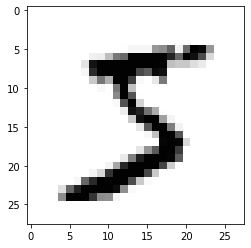

In [ ]:
plt.imshow(x_train[0],cmap='Greys')

### X 전처리

In [ ]:
for x in x_train[0]:
  for i in x:
    sys.stdout.write("%d\t" %i)
  sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


데이터 1개에 28*28 배열 
안에는 0~255의 값 

1차원 배열로 풀어주고 0 ~ 1 로 값 축소 필요함

In [ ]:
# 배열 차원 바꾸기
x_train = x_train.reshape(x_train.shape[0],28*28)
x_train.shape 

(60000, 784)

In [ ]:
x_test = x_test.reshape(x_test.shape[0],28*28)
x_test.shape

(10000, 784)

In [ ]:
# 0 ~ 1 로 만들기
x_train = x_train.astype(float)/255
x_test = x_test.astype(float)/255

### y 전처리

In [ ]:
y_train[0]

5

In [ ]:
# one hot encoding
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## 배운 모델 돌려보기

In [ ]:
model = Sequential()
model.add(Dense(512,input_dim =28*28,activation='relu'))
model.add(Dense(10,activation='softmax')) # 다중 분류


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

In [ ]:
model_dir="./model/"
if not os.path.exists(model_dir):
  os.mkdir(model_dir)
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss' ,patience=10)

In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=200,
                  verbose=0,callbacks=[early_stopping_callback,checkpointer] )


Epoch 00001: val_loss improved from inf to 0.14658, saving model to ./model/01-0.1466.hdf5

Epoch 00002: val_loss improved from 0.14658 to 0.10113, saving model to ./model/02-0.1011.hdf5

Epoch 00003: val_loss improved from 0.10113 to 0.08558, saving model to ./model/03-0.0856.hdf5

Epoch 00004: val_loss improved from 0.08558 to 0.07507, saving model to ./model/04-0.0751.hdf5

Epoch 00005: val_loss improved from 0.07507 to 0.06838, saving model to ./model/05-0.0684.hdf5

Epoch 00006: val_loss improved from 0.06838 to 0.06095, saving model to ./model/06-0.0610.hdf5

Epoch 00007: val_loss did not improve from 0.06095

Epoch 00008: val_loss did not improve from 0.06095

Epoch 00009: val_loss did not improve from 0.06095

Epoch 00010: val_loss did not improve from 0.06095

Epoch 00011: val_loss improved from 0.06095 to 0.05753, saving model to ./model/11-0.0575.hdf5

Epoch 00012: val_loss did not improve from 0.05753

Epoch 00013: val_loss did not improve from 0.05753

Epoch 00014: val_lo

In [ ]:
model.evaluate(x_test,y_test)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.0660 - accuracy: 0.9842


0.9842000007629395

Text(0, 0.5, 'loss')

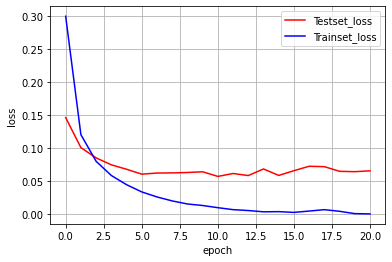

In [ ]:
y_vloss=history.history['val_loss']#테스트셋 오차
y_loss=history.history['loss']#학습셋 오차
x_len=np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c="red",label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c="blue",label="Trainset_loss")
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')


## CNN

더 성능을 높여보자

이론은 교안으로
- cnn 등장시기? 배경? 역사? 
- 컨볼루션 연산
- 맥스풀링,드롭아웃? 

처음이면 많이 어려울 수 있는 개념..

한번에 너무 많은 정보를 접하면 지칠수도 있으니

균형을 적절히..


**참고 영상**
- https://youtu.be/8ZEDKm9-Zys
- https://youtu.be/Em63mknbtWo




In [ ]:
# 데이터 새로 불러오기
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
# x 전처리 이경우 (:,28,28,1)로 
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)


In [ ]:
# 0 ~ 1 로 만들기
x_train = x_train.astype(float)/255
x_test = x_test.astype(float)/255

In [ ]:
# y 전처리
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
from tensorflow.keras.layers import Conv2D,Dropout,Flatten,MaxPooling2D
model = Sequential()
model.add(Conv2D(64,kernel_size=(6,6),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2)) # 맥스풀링
model.add(Dropout(0.2)) # 드롭아웃
model.add(Flatten()) # (28,28,1) 에서 다시 (28*28) 으로
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax')) # 다중 분류



In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=10,verbose=1)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary() # 모델 쌓은 층 보여줌 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 23, 23, 64)        2368      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1638912   
_________________________________________________________________
dense_3 (Dense)              (None, 256)              

In [ ]:
model.fit(x_train,y_train,batch_size=512,epochs=5000,verbose=1,callbacks=[early_stop],

          validation_data =(x_test,y_test))

Epoch 1/5000
118/118 [==============================] - 8s 24ms/step - loss: 0.6494 - accuracy: 0.7908 - val_loss: 0.0657 - val_accuracy: 0.9792
Epoch 2/5000
118/118 [==============================] - 3s 22ms/step - loss: 0.0672 - accuracy: 0.9798 - val_loss: 0.0427 - val_accuracy: 0.9869
Epoch 3/5000
118/118 [==============================] - 3s 22ms/step - loss: 0.0437 - accuracy: 0.9862 - val_loss: 0.0288 - val_accuracy: 0.9907
Epoch 4/5000
118/118 [==============================] - 3s 22ms/step - loss: 0.0275 - accuracy: 0.9912 - val_loss: 0.0304 - val_accuracy: 0.9903
Epoch 5/5000
118/118 [==============================] - 3s 22ms/step - loss: 0.0224 - accuracy: 0.9929 - val_loss: 0.0265 - val_accuracy: 0.9906
Epoch 6/5000
118/118 [==============================] - 3s 22ms/step - loss: 0.0166 - accuracy: 0.9945 - val_loss: 0.0253 - val_accuracy: 0.9915
Epoch 7/5000
118/118 [==============================] - 3s 22ms/step - loss: 0.0124 - accuracy: 0.9962 - val_loss: 0.0291 - val_ac

In [ ]:
model.evaluate(x_test,y_test)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.0314 - accuracy: 0.9912


0.9911999702453613

0.98->0.99

CNN 의 등장으로 뭐가 달라졌는지?

CNN 주로 어느분야에서 잘 먹히는지
간략한 소개...
http://www.aitimes.kr/news/articleView.html?idxno=13025
등등